<a href="https://colab.research.google.com/github/sruthipsuresh/TwitterSentimentAnalysis/blob/main/Textblob_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Inspired by https://towardsdatascience.com/understanding-political-twitter-ce3476a38377 to practice textblob use
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
! pip install -U textblob
from textblob import TextBlob
from google.colab import files
import matplotlib.pyplot as plt
% matplotlib inline


Requirement already up-to-date: textblob in /usr/local/lib/python3.6/dist-packages (0.15.3)


In [2]:
# Import data file
textblob = pd.read_csv('/content/textblob.csv')
textblob = pd.DataFrame(textblob)


In [3]:
# Run test case
tweettxt = textblob.tweet[0]
str(tweettxt)
analysis = TextBlob(tweettxt)
print("The test case is '" + tweettxt + "' and the sentiment calculation is" + str(analysis.sentiment))

The test case is 'The debate Democrats should be having is how much *more* we should be helping people this year, not how much less.' and the sentiment calculation isSentiment(polarity=0.16666666666666669, subjectivity=0.2833333333333333)


I would expect a higher subjectivity and polarity but since we're running a test, it should work for our purposes.

In [4]:
textblob['tweet'] = textblob['tweet'].astype(str)
polarity = lambda x: TextBlob(x).sentiment.polarity
subjectivity = lambda x: TextBlob(x).sentiment.subjectivity
textblob['polarity'] = textblob['tweet'].apply(polarity)
textblob['subjectivity'] = textblob['tweet'].apply(subjectivity)
textblob.head()

,Unnamed: 0,username,tweet,polarity,subjectivity
0,0,aoc,The debate Democrats should be having is how m...,0.166667,0.283333
1,1,aoc,Yes - it’s retroactive back to Jan 2020.,0.000000,0.000000
2,2,aoc,How about we “means test” corporate tax breaks,0.000000,0.000000
3,3,aoc,Nationwide.,0.000000,0.000000
4,4,aoc,(Sorry for the previous typo. Cold fingers! 🥶),-0.472222,0.722222


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

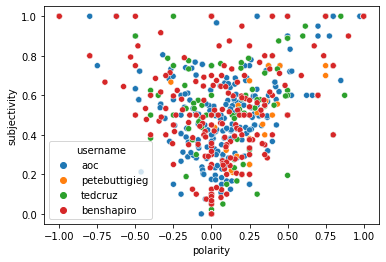

In [8]:
sns.scatterplot(data=textblob, x="polarity", y="subjectivity", hue="username")
plt.savefig('polvssub.png')
files.download('polvssub.png')


NameError: ignored